Finds which graph avoids overlapping annotations and chart elements.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

For demonstrational purposes, we make two graphs, one with overlapping and one without.  We want our program to choose the one without.

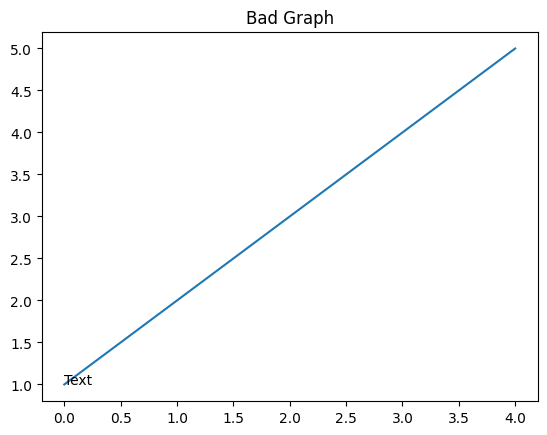

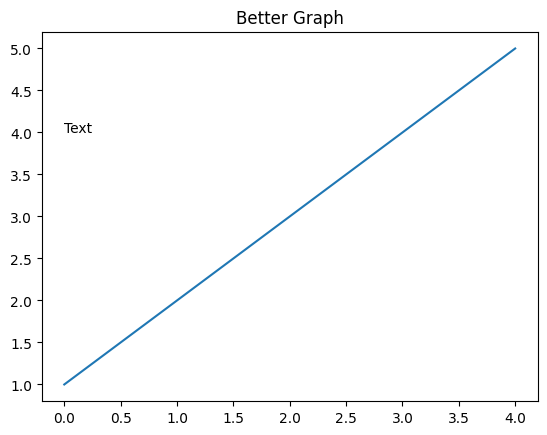

In [2]:
y = [1, 2, 3, 4, 5]

fig, ax = plt.subplots()
ax.plot(y)
ax.annotate('Text', xy=(0,1))
plt.title('Bad Graph')
plt.savefig('badgraph')
plt.show()

fig, ax = plt.subplots()
ax.plot(y)
ax.annotate('Text', xy=(0,4))
plt.title('Better Graph')
plt.savefig('bettergraph')
plt.show()

The program picks whichever graph has the most number of pixels that are the same color as the line (blue by default).  The graph that doesn't have any overlap will have the most blue pixels.

In [3]:
def avoid_overlap(options, line_color = [31, 119, 180]):
    scores = []
    for option in options: #TODO performance can be improved by avoiding using for loop
        pixelmap = np.asarray(Image.open(option))
        score = 0
        for row in pixelmap:
            for pixel in row:
                if np.all(pixel[0:3] == line_color): #TODO add support for multiple colors
                    score += 1
        scores.append(score) #TODO add support for if there isn't an exact color match
    return options[scores.index(max(scores))]

When we run this function on our two graphs, it identifies the correct graph as better.

In [4]:
options = ['badgraph.png', 'bettergraph.png']
fig1 = 'badgraph.png'
fig2 = 'bettergraph.png'
avoid_overlap(options)

[475, 483]


'bettergraph.png'